# Initial Analysis of Data

In [1]:
#Imports
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

Loading the Megaset that we created by combining all the information.

In [2]:
df_megaset = pd.read_csv('data/megaset.csv')
print(df_megaset['Year'].isna().sum())

6948


In [3]:
# Filter the data: 
df_megaset['Name'].isna().sum()

6948

## Examining the dataset

Languages movie count

In [4]:
df_megaset.value_counts("Languages").head(10)

Languages
english                 32831
hindi                    2812
spanish                  2513
silent film, english     2262
french                   1774
italian                  1697
japanese                 1608
tamil                    1536
malayalam                1328
german                   1127
Name: count, dtype: int64

Countries movie count

In [5]:
df_megaset.value_counts("Countries").head(10)

Countries
united states of america                    29328
india                                        7629
united kingdom                               5006
japan                                        2025
france                                       1732
italy                                        1632
argentina                                    1230
canada                                       1227
united states of america, united kingdom      841
south korea                                   767
Name: count, dtype: int64

Number of countries with more than 500 movie counts

Total number of countries : 145
Number of countries with more than 500 counts : 20


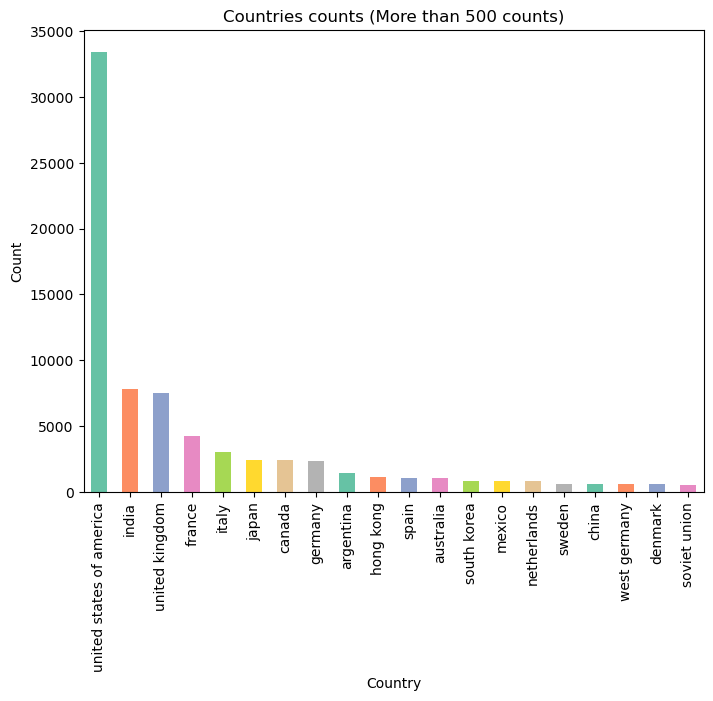

In [6]:
# Drop rows with empty values for country of origin, count the movies from each country

df_countries = df_megaset.dropna(subset=['Countries'])
countries_counts = df_countries['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

# Set a threshold to avoid overcharging the plot, and focus on the most important values
count_threshold = 500
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


As expected, the large majority of movies originate from the United States, which justifies our main focus on American movies. We do see, however, that there are a fair amount of movies from India, the United Kingdom, and France. We can use these as starting off points for our case studies later on. 

Number of languages with more than 40 movie counts

Total number of languages : 207
Number of countries with more than 40 counts : 57


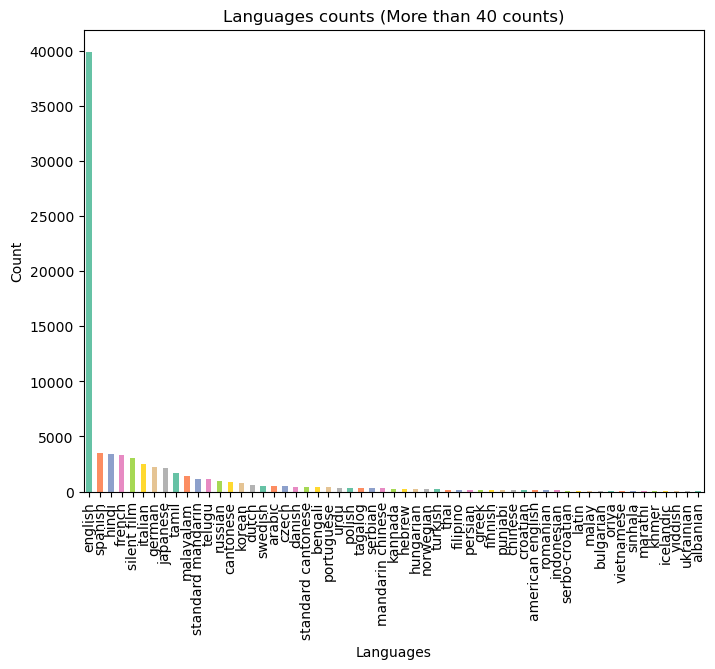

In [7]:
languages_counts = df_megaset['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

Due to the dominance of American movies in the dataset, it comes as no surprise that English is therefore the language at the forefront of our dataset.

Defining additional analysis functions

In [8]:
def keep_year(s):
    s = str(s)
    if s == 'nan': 
        return
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True

Year movie count

In [9]:
df_megaset.Year = df_megaset.Year.apply(lambda x: keep_year(x))
df_megaset = df_megaset[df_megaset['Year'].apply(lambda x: filter_year(x))]
df_megaset.head()
df_megaset.Year.value_counts()

Year
2008.0    2550
2006.0    2515
2007.0    2464
2009.0    2346
2005.0    2189
          ... 
1890.0       2
1893.0       1
1889.0       1
1888.0       1
1904.0       1
Name: count, Length: 137, dtype: int64

The combined dataset incorporating the different sources of data mentioned in ReadMe is displayed below.

In [10]:
df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010.0,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##############################################...,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,##############################################...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#1 cheerleader camp,2010.0,NaN,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87068,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87070,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87071,₤500 reward,1918.0,"silent film, english",NaN,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min and Max Year and Revenue

In [11]:
print(f"Minimum year is {df_megaset.Year.min()}")
print(f"Maximum year is {df_megaset.Year.max()}")
print(f"Minimum revenue is {df_megaset.worldwide_gross.min()}")
print(f"Maximum revenue is {df_megaset.worldwide_gross.max()}")

Minimum year is 1888.0
Maximum year is 2024.0
Minimum revenue is 1961544.0
Maximum revenue is 2776345279.0


# Basic Analysis on our Megaset

### Foreign & Domestic Percentages Distribution

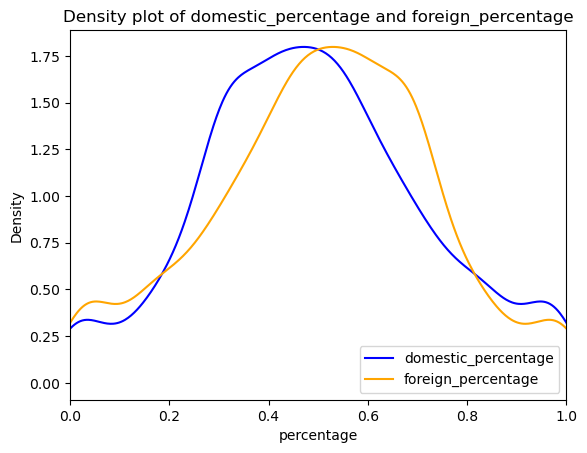

In [12]:
df_copy = df_megaset.copy(deep=True)
df_percentage = df_copy.dropna(subset=['domestic_percentage', 'foreign_percentage'])

df_percentage.domestic_percentage.plot.density(color='blue')
df_percentage.foreign_percentage.plot.density(color='orange')

plt.title('Density plot of domestic_percentage and foreign_percentage')
plt.xlabel('percentage')
plt.xlim(0, 1)
plt.legend(["domestic_percentage", "foreign_percentage"], loc="lower right")
plt.show()

We can see that the domestic and foreign percentages reflect each other, as they should. They resemble a normal distribution, with the mean around 50%, and with two small peaks near 0 and 100%. We can only imagine that those peaks represent movies curated with purely domestic or foreign consumers in mind, and that they have reached their targets. We can also see that the center of the foreign percentage lies slightly higher than that of the domestic, supporting our theory that the foreign consumers are of larger importance than the domestic ones.

### Distribution of Years

2024.0


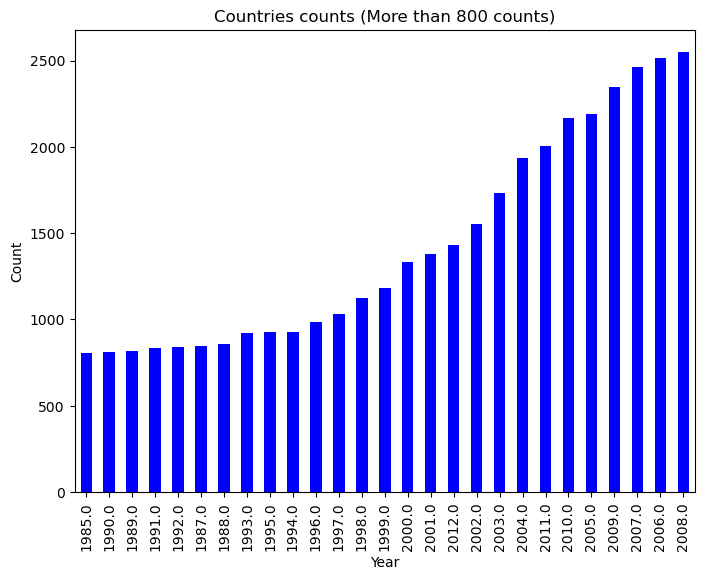

In [13]:
df_copy = df_megaset.copy(deep=True)
df_years = df_copy.dropna(subset=['Year'])
print(df_years['Year'].max())

years_count = df_years['Year'].explode().value_counts().sort_values()

count_threshold = 800
df_years_count = years_count[years_count > count_threshold]
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
df_years_count.plot(kind='bar', color='blue')
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

We can see that the period between 2000-2010 has the most amount of movies released. We should take this into consideration when doing our Time Series analysis.

# Genre Preference

Preferences in genre in US vs World for american movies (plotting the most common genres, showcasing their corresponding foreign vs domestic gross)

Getting a list of all genres and choosing the most common 20

In [14]:
df_megaset
# Getting the genre list and its count
# Replacing the slashes with commas to ensure a splitting when encountering commas and slashes
all_genres = (
    df_megaset['Genres']
    .dropna()  # Removing NaN values from the Genres column
    .str.replace('/', ', ')  # Replacing slashes with a comma and space
    .str.split(', ')  # Splitting by comma and space
    .explode()  # Flattening the list of genres into individual rows
    .value_counts()  # Counting occurrences of each genre
)
top_20_genres = all_genres.head(20).index
top_20_genres

Index(['drama', 'comedy', 'action', 'romance film', 'adventure',
       'black-and-white', 'thriller', 'short film', 'world cinema', 'indie',
       'crime fiction', 'silent film', 'documentary', 'horror', 'family film',
       'musical', 'comedy film', 'romantic drama', 'mystery', 'animation'],
      dtype='object', name='Genres')

Plotting a bar plot showcasing the sum of the domestic and foregin gross for each chosen genre

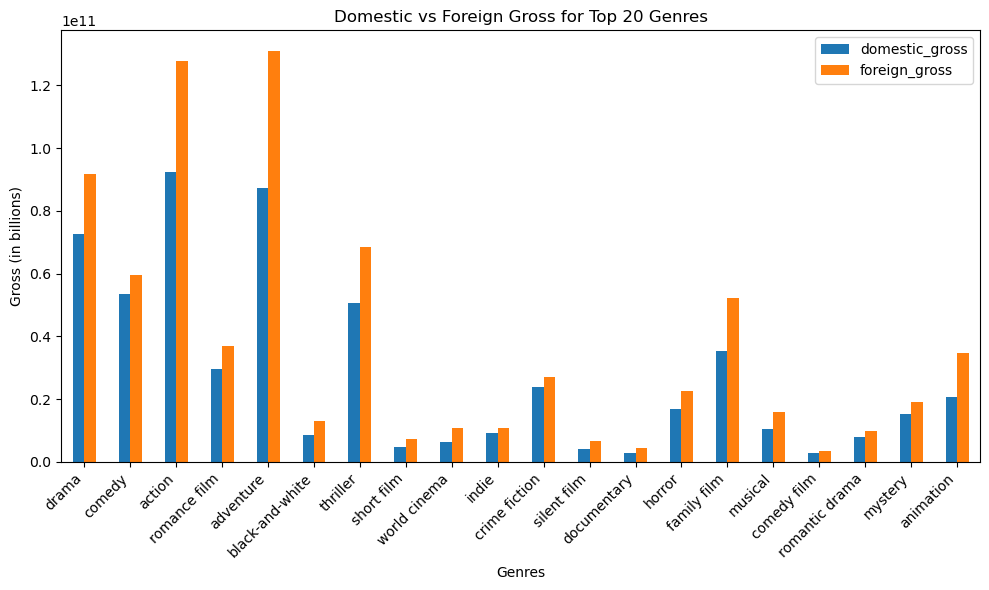

In [15]:
# Creating a new DataFrame excluding rows with NaN in the relevant columns so it doesn't affect the final plots
filtered_df = df_megaset.dropna(subset=['Genres', 'domestic_gross', 'foreign_gross'])

# Initializing a dictionary to store gross for each genre in the top 20
genre_gross = {genre: {'domestic_gross': 0, 'foreign_gross': 0} for genre in top_20_genres}

# Iterating through the filtered dataset and summing gross for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).replace('/', ', ').split(', ')# Splitting the genres of the current movie ('/' and ', ' considered as separations)
    domestic = row['domestic_gross']                          # Storing the corresponding domestic_gross value
    foreign = row['foreign_gross']                            # Storing the corresponding foreign_gross value
    
    for genre in genres:
        # If the genre is in the top 20, we sum the gross to that genre
        if genre in top_20_genres:
            genre_gross[genre]['domestic_gross'] += domestic
            genre_gross[genre]['foreign_gross'] += foreign

# Converting the dictionary into a DataFrame for plotting
df_genre_gross = pd.DataFrame(genre_gross).T  # Transposing
df_genre_gross = df_genre_gross[['domestic_gross', 'foreign_gross']]  # Keeping only the relevant columns for plotting

# Plotting 
df_genre_gross.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Domestic vs Foreign Gross for Top 20 Genres')
plt.ylabel('Gross (in billions)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar plot showcases the dominance of foreign gross (orange) over domestic gross (blue) across all of the top 20 genres, especially for action, adventure, drama, thriller and family film; indicating strong international appeal. In contrast, genres like comedy, romance film and crime fiction show a more balanced domestic and foreign gross, suggesting greater resonance with U.S. audiences. Overall, while this chart reveals genre-specific market preferences, it is susceptible to skewing, as genres with more movies will naturally have higher gross totals.

Plotting a bar plot showcasing the average of the domestic and foreign gross percentage for each chosen genre

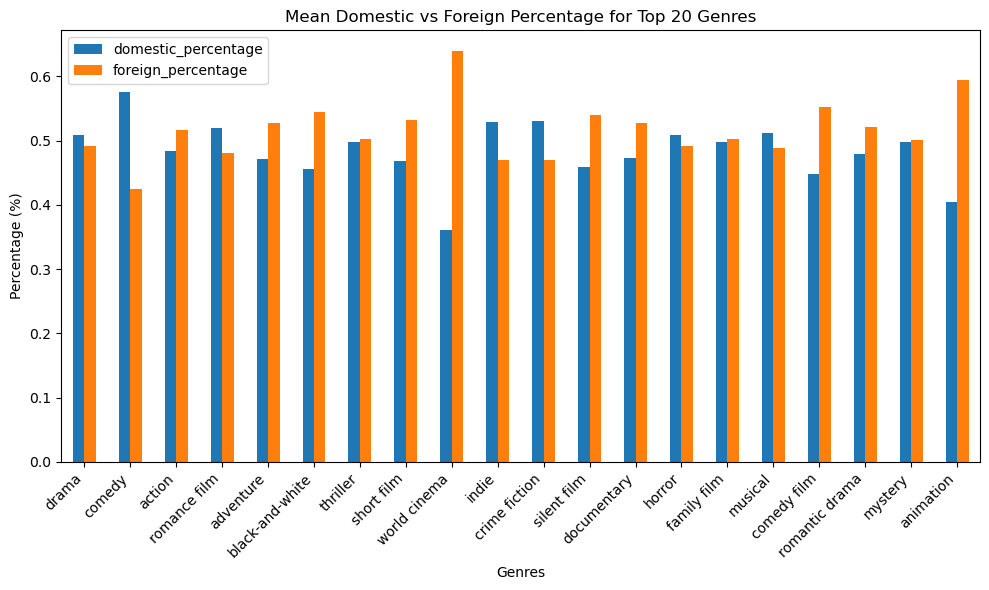

In [16]:
# Creating a new DataFrame excluding rows with NaN in the relevant columns so it doesn't affect the final plots
filtered_df = df_megaset.dropna(subset=['Genres', 'domestic_percentage', 'foreign_percentage'])

# Initializing a dictionary to store mean percentages for each genre in the top 20
genre_percentages = {genre: {'domestic_percentage': [], 'foreign_percentage': []} for genre in top_20_genres}

# Iterating through the filtered dataset and collecting percentages for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).replace('/', ', ').split(', ')# Splitting the genres of the current movie ('/' and ', ' considered as separations)
    domestic_percentage = row['domestic_percentage']          # Storing the corresponding domestic_percentage value
    foreign_percentage = row['foreign_percentage']            # Storing the corresponding foreign_percentage value
    
    for genre in genres:
        # If the genre is in the top 20, we collect the percentages for that genre
        if genre in top_20_genres:
            genre_percentages[genre]['domestic_percentage'].append(domestic_percentage)
            genre_percentages[genre]['foreign_percentage'].append(foreign_percentage)

# Calculating the mean percentages for each genre
mean_percentages = {
    genre: {
        'domestic_percentage': sum(values['domestic_percentage']) / len(values['domestic_percentage']),
        'foreign_percentage': sum(values['foreign_percentage']) / len(values['foreign_percentage']),
    }
    for genre, values in genre_percentages.items() if len(values['domestic_percentage']) > 0
}

# Converting the dictionary into a DataFrame for plotting
df_genre_percentages = pd.DataFrame(mean_percentages).T  # Transposing
df_genre_percentages = df_genre_percentages[['domestic_percentage', 'foreign_percentage']]  # Keeping only the relevant columns for plotting

# Plotting 
df_genre_percentages.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Mean Domestic vs Foreign Percentage for Top 20 Genres')
plt.ylabel('Percentage (%)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar plot shows the mean domestic and foreign percentages for the top 20 genres, offering a more accurate representation by averaging the percentages rather than summing gross values. Unlike the previous graph, which is heavily influenced by the number of movies in each genre, this plot minimizes that impact, providing a clearer view of each genre's relative appeal. Notably, foreign percentages remain high across most genres, though the differences are less pronounced than in the total gross comparison.

We thus observe different trends, with genres like drama, crime fiction, indie, and especially comedy showing a higher mean domestic percentage compared to their foreign counterpart.

# Proportion of Domestic vs Foreign gross for US movies

Domestic vs Foreign Income, Total and Percentage, for American movies over time

In [17]:
year_min = df_megaset['Year'].min()
year_max = df_megaset['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

The range of the 'Year' column is: 1888.0 to 2024.0


In [18]:
df_gross = df_megaset.drop(columns=['Budget', 'Languages', 'Genres', 'Tropes'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross

,Name,Year,Countries,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
193,127 hours,2010.0,"united states of america, united kingdom",18335230.0,0.301870,42403567.0,0.698130,60738797.0
204,13 going on 30,2004.0,united states of america,57231747.0,0.585487,40518989.0,0.414513,97750736.0
226,1408,2007.0,united states of america,71985628.0,0.541394,60977789.0,0.458606,132963417.0
232,15 minutes,2001.0,"united states of america, germany",24403552.0,0.432994,31956428.0,0.567006,56359980.0
238,16 blocks,2006.0,"united states of america, germany",36895141.0,0.561872,28769580.0,0.438128,65664721.0
...,...,...,...,...,...,...,...,...
86737,zero dark thirty,2012.0,united states of america,95720716.0,0.711084,38891719.0,0.288916,134612435.0
86822,zodiac,2007.0,united states of america,33080084.0,0.390160,51705830.0,0.609840,84785914.0
86869,zombieland,2009.0,united states of america,75590286.0,0.738243,26801794.0,0.261757,102392080.0
86890,zookeeper,2011.0,united states of america,80360866.0,0.470482,90444659.0,0.529518,170805525.0


The code below designs a histogram which gives the distribution of movies produced per year. 

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

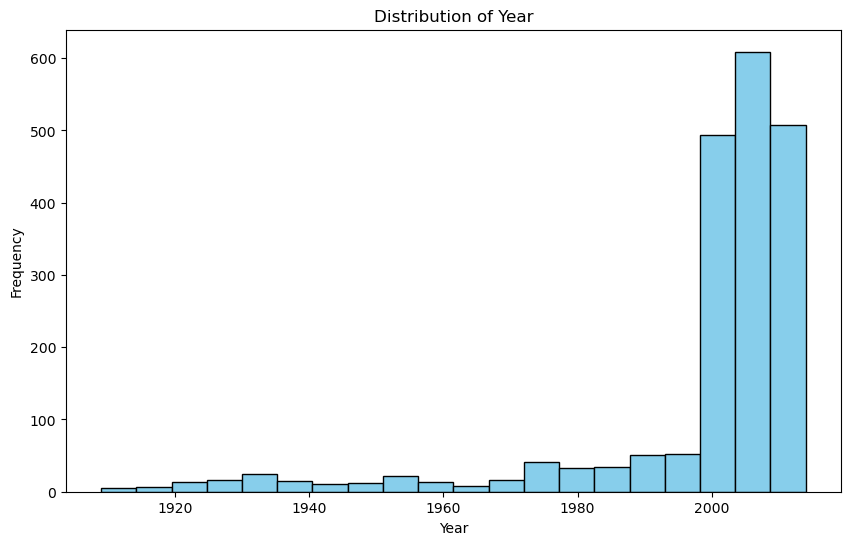

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

The histogram demonstrates a clear bias in the dataset towards movies that were produced more recently, this could in large part be down to the increased collection of data once the information age arrived.

In [20]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 1909.0 to 2014.0


In order to see how the worldwide gross for US films has changed over time, we use a scatterplot for each of the American movies in our dataset.

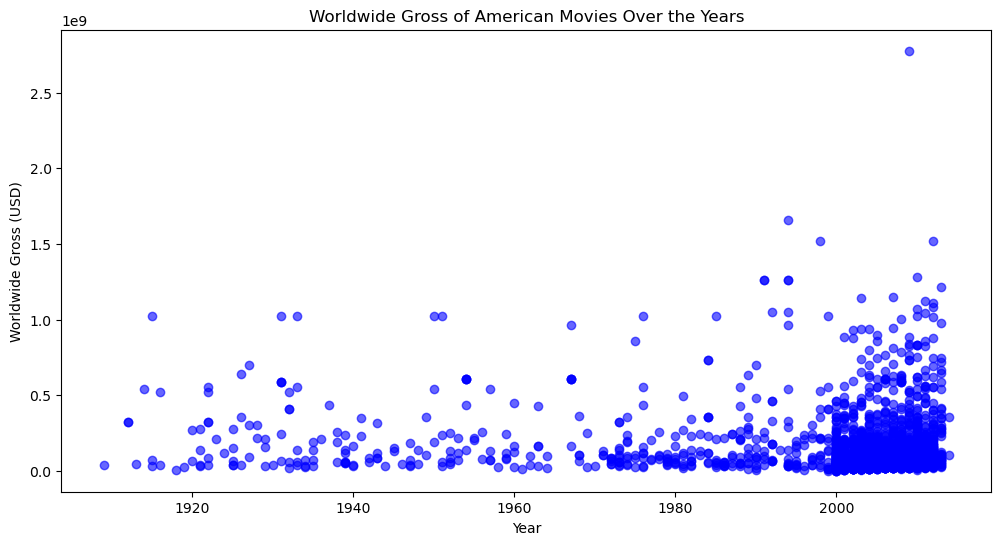

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['worldwide_gross'], color='blue', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

plt.show()

The scatterplot does not show any clear trend towards an overall increase in worldwide gross as we approach the present day despite factors like inflation which would have suggested an increase.

The bar chart featured below was created with the intent of checking the trends in average worldwide gross per year (from 2000 to 2016) with a domestic/foreign gross split.

In [22]:
df_gross = df_gross[(df_gross['Year'] > 1999)&(df_gross['Year'] < 2017)]

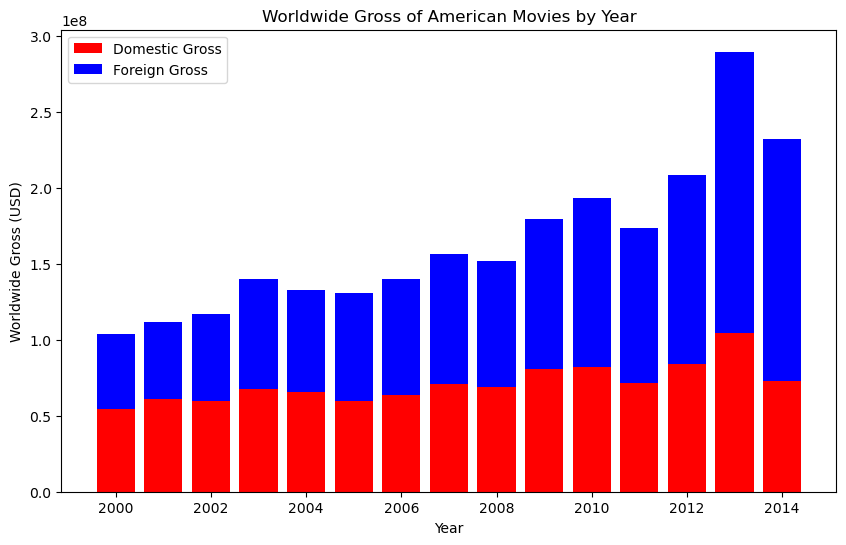

In [23]:
yearly_data = df_gross.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

plt.show()

As can be seen above, the gross overall has increased through the years with in general the foreign gross outpacing the domestic gross.

The lineplots below were made to showcase how the share of domestic vs foreign income changes over time.

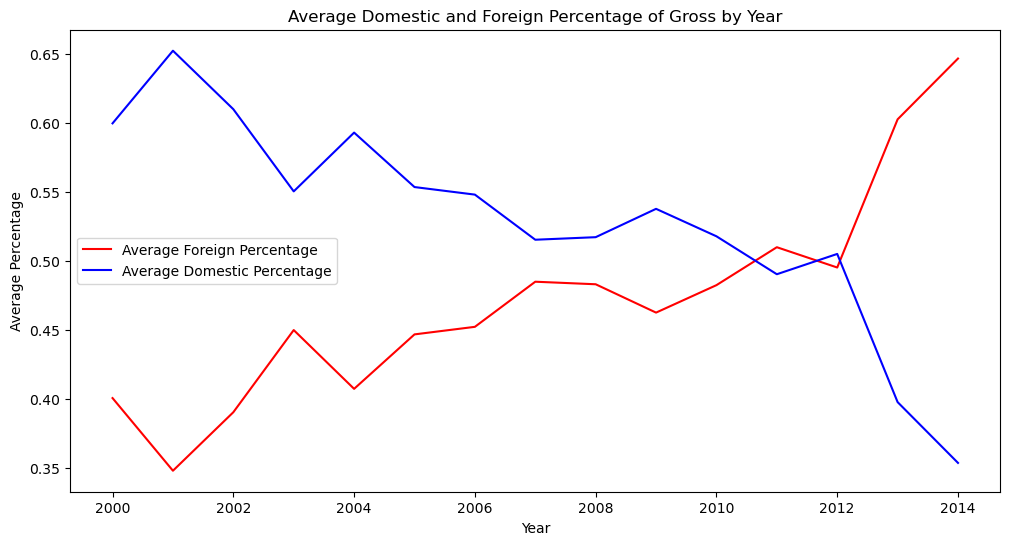

In [24]:
average_percentages = df_gross.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

plt.figure(figsize=(12, 6))

plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

plt.show()

The graph above clearly shows that the domestic share of the total revenue has fallen from 2000 onwards, and consequentially the inverse is true for the foreign share.

# Budget Influence

Budget vs Foreign and Domestic Income for American Movies

In [25]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

initial length of the dataset: 87072
Length after removing all the Nans: 2917
-----------------------------------------------
Pearson coeff on budget and domestic
PearsonRResult(statistic=-0.36033860216485736, pvalue=3.756198707823775e-90)
Pearson coeff on budget and foreign
PearsonRResult(statistic=0.36033860216485736, pvalue=3.756198707823775e-90)


,Name,Budget,domestic_percentage,foreign_percentage
85,10 cloverfield lane,5000000.0,0.654010,0.345990
184,12 strong,35000000.0,0.644274,0.355726
188,12 years a slave,20000000.0,0.301875,0.698125
193,127 hours,18000000.0,0.301870,0.698130
204,13 going on 30,37000000.0,0.585487,0.414513


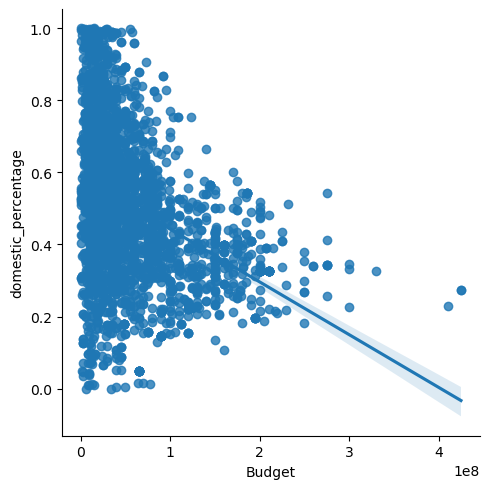

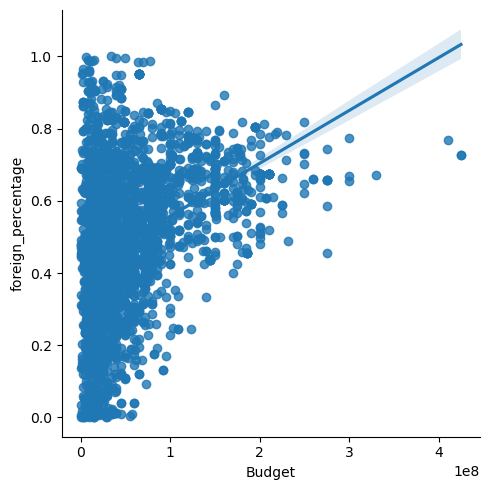

In [26]:
import seaborn as sn
from statsmodels.stats import diagnostic
from scipy import stats

df_meg_copy = df_megaset.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget', 'domestic_percentage', 'foreign_percentage']]

print(f"initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['domestic_percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['foreign_percentage'].notna()]

print(f"Length after removing all the Nans: {len(df_meg_copy)}")
print("-----------------------------------------------")
df_meg_copy = df_meg_copy[df_meg_copy.foreign_percentage < 1]

sn.lmplot(x='Budget',y='domestic_percentage', data=df_meg_copy)

print("Pearson coeff on budget and domestic")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['domestic_percentage']))

sn.lmplot(x='Budget',y='foreign_percentage', data=df_meg_copy)
print("Pearson coeff on budget and foreign")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['foreign_percentage']))
df_meg_copy.head()




The two graphs above show a correlation where as budget increases, the income percentage that comes from foreign markets increases while it decreases for domestic markets.